In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib .pyplot as plt
books= pd.read_csv('Books.csv')
users= pd.read_csv('Users.csv')
ratings= pd.read_csv('Ratings.csv')


C:\Users\impre\AppData\Local\Temp\ipykernel_3848\3462534693.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books= pd.read_csv('Books.csv')


In [2]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [6]:
books.isnull().sum()


ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
users.isnull().sum()
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
books.duplicated().sum()

0

In [9]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [10]:
books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-M']]

In [11]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [12]:
books.rename(columns={"Book-Title" :"title", "Book-Author":"author", "Year-Of-Publication":"year","Publisher":"publisher", "Image-URL-M":"img_url"},inplace = True)

In [13]:
books.head()

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [14]:
ratings_with_num=ratings.merge(books,on='ISBN')
num_rating_data=ratings_with_num.groupby('title').count()['Book-Rating'].reset_index()
num_rating_data.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)
num_rating_data

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [15]:
avg_rating_data = ratings_with_num.groupby('title')['Book-Rating'].agg(lambda x: x.astype(float).mean()).reset_index()
avg_rating_data.rename(columns = {'Book-Rating' : 'avg_of_rating'}, inplace = True)
avg_rating_data

,title,avg_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [16]:
recmder_df= num_rating_data.merge(avg_rating_data, on='title')
recmder_df=recmder_df[recmder_df['num_of_rating']>=250].sort_values('avg_of_rating',ascending=False).head(20)
recmder_df=recmder_df.merge(books,on='title').drop_duplicates('title') [['title','author','img_url','publisher','num_of_rating','avg_of_rating']]
recmder_df

,title,author,img_url,publisher,num_of_rating,avg_of_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,Scholastic,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,Scholastic,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,Scholastic,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,Scholastic,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,Scholastic,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,Del Rey,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,Del Rey,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,Arthur A. Levine Books,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,Del Rey,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,Little Brown &amp; Company,510,4.700000


## Second Filtering method i.e. collaborative Filter

In [17]:
#rating_on_book = ratings_with_num.groupby('User-ID').count()['Book-Rating']>100
#rating_on_book = ratings_with_num.groupby('User-ID').count()['Book-Rating']>150
#rating_on_book
rating_on_book = ratings_with_num.groupby('User-ID').count()['Book-Rating']>200
great_raters = rating_on_book[rating_on_book].index
user_final_ratings = ratings_with_num[ratings_with_num['User-ID'].isin(great_raters)]
user_final_ratings.head(50)
#book_final_rating=user_final_ratings.groupby('title').count()['Book-Rating']>=10
book_final_rating=user_final_ratings.groupby('title').count()['Book-Rating']>=50
#high_rated_books=book_final_rating[book_final_rating]
#high_rated_books
high_rated_books=book_final_rating[book_final_rating].index
high_rated_books_list = high_rated_books.tolist()

In [18]:
required_data=user_final_ratings[user_final_ratings['title'].isin(high_rated_books)]
data_format = required_data.pivot_table(index='title', columns='User-ID', values='Book-Rating')
data_format.fillna(0,inplace=True)
print(data_format.head(50))
similarity_score=cosine_similarity(data_format)


User-ID                                             254     2276    2766    \
title                                                                        
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     7.0   
A Case of Need                                         0.0     0.0     0.0   
A Child Called \It\": One Child's Courage to Su...     0.0     0.0     0.0   
A Civil Action                                         0.0     0.0     0.0   
A Day Late and a Dollar Short                          0.0     0.0     0.0   
A Fine Balance                                         0.0     0.0     0.0   
A Great Deliverance                                    0.0     0

In [19]:
def book_recommender(book_name):
    if book_name not in data_format.index:
        print(f"Book '{book_name}' not found in the dataset.")
        return
    #book_location=np.where(data_format.index=='1984')
    #book_location
    book_location=np.where(data_format.index==book_name)[0][0]
    #dstnce=similarity_score(index)
    #sorted(list(enumerate(similarity_scores[0]))
    recmnded_books=sorted(list(enumerate(similarity_score[book_location])),key=lambda x:x[1],reverse=True)[1:8]
    book_titles = [data_format.index[i[0]] for i in recmnded_books]
    scores = [i[1] for i in recmnded_books]
    for i in recmnded_books:
        #print(i[0])
        print(data_format.index[i[0]])
    plt.figure(figsize=(10, 6))
    plt.barh(book_titles, scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.title(f'Books Similar to "{book_name}"')
    plt.gca().invert_yaxis()
    plt.show()
    #return recmnded_books

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
Fahrenheit 451
The Catcher in the Rye


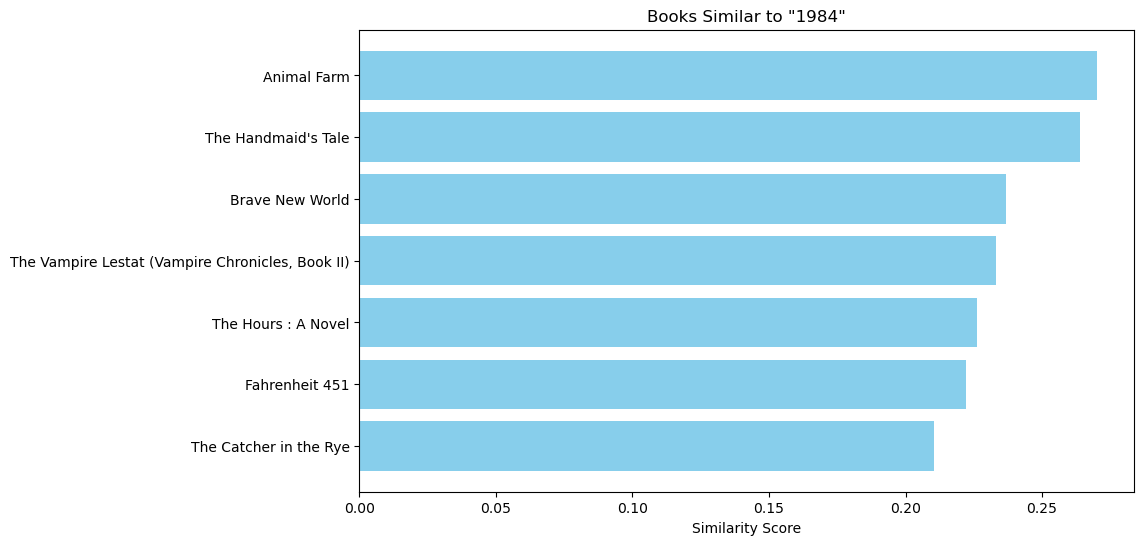

In [20]:
book_recommender('1984')

In [24]:
import pickle
pickle.dump(recmder_df, open('popular.pkl','wb'), protocol=pickle.HIGHEST_PROTOCOL)